
TEAM 10 :
Sunku Sumeghana - 1002063330

Reddi Sai Ruthwik - 1002063535

Sujith Sadineni     -1002079784




In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# **DATASET A**

In [ ]:
# Load the dataset
df1 = pd.read_csv('spam_or_ham_and_sentiment_version1.csv')
df1 = df1[['Comment in English', 'Sentiment']]
df1.rename({'Comment in English': 'Comments'}, axis=1, inplace=True)
df1['Sentiment'] = df1['Sentiment'].factorize()[0]
df1 = df1[df1.Sentiment != 2].reset_index(drop=True)
df1

,Comments,Sentiment
0,Imagine car size potholes on road.,0
1,This defeats the definition of cars,0
2,When you realize the bottom of the earth is em...,1
3,Hyperpod?,0
4,"We have to learn this for a school project, so...",1
...,...,...
3995,im just getting fuckin old but the world allwa...,0
3996,Gotta start somewhere before making tunnels on...,0
3997,Could be the start of a historical company,0
3998,No.3,0


# **DATASET-2**

In [ ]:
#Load the other dataset
df2 = pd.read_csv('youTubeSent.csv')
df2 = df2[['Comments', 'Positive', 'Negative']]
df2['Sentiment'] = df2.apply(lambda x: 1 if x['Positive'] == 1 else 0 if x['Negative'] == 1 else -1, axis=1)
df2 = df2[df2.Sentiment != -1].drop(['Positive', 'Negative'], axis=1).reset_index(drop=True)
df2

,Comments,Sentiment
0,I love you Cory. You're my favorite.,1
1,I love u cory,1
2,Congratulations for 50.5 Million subscribers,1
3,You are awesome,1
4,I love you Cory,1
...,...,...
663,Here comes the women and people of color talk ...,0
664,"It's crazy, so long nobody has travelled there.",0
665,Working for CNN must feel like shit.. Shilling...,0
666,All left Wang media is bad,0


# **COMBINE DATASET-A AND DATASET-B**

In [ ]:
# Append dataset B below Dataset A
df = df1.append(df2).reset_index(drop=True)
df

<ipython-input-10-6243dfc965dd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2).reset_index(drop=True)


,Comments,Sentiment
0,Imagine car size potholes on road.,0
1,This defeats the definition of cars,0
2,When you realize the bottom of the earth is em...,1
3,Hyperpod?,0
4,"We have to learn this for a school project, so...",1
...,...,...
4663,Here comes the women and people of color talk ...,0
4664,"It's crazy, so long nobody has travelled there.",0
4665,Working for CNN must feel like shit.. Shilling...,0
4666,All left Wang media is bad,0


# **PREPROCESSING**

**REMOVAL OF STOPWORDS**

In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_text)

In [ ]:
stop = set(stopwords.words('english'))
#removing punctuation marks
punctuation = list(string.punctuation)
#adding punctuations to the list of stop words 
stop.update(punctuation)

#Removing the square brackets
def remove_brackets(Comments):
    return re.sub('\[[^]]*\]', '', Comments)

# Removing URL's
def remove_urls(Comments):
    return re.sub(r'http\S+', '', Comments)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(Comments):
    final_text = []
    Comments = Comments.lower()
    for i in Comments.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def clean_text(Comments):
    Comments = remove_brackets(Comments)
    Comments = remove_urls(Comments)
    Comments = remove_stopwords(Comments)
    return Comments

#Apply function on text column
df['Comments']=df['Comments'].apply(clean_text)
df['Comments']

0                         imagine car size potholes road.
1                                 defeats definition cars
2                 realize bottom earth empty....... dead?
3                                               hyperpod?
4                          learn school project, boring 😗
                              ...                        
4663    comes women people color talk shut fuck enjoy ...
4664                  crazy, long nobody travelled there.
4665    working cnn must feel like shit.. shilling wor...
4666                                  left wang media bad
4667                    fox news good left wang media bad
Name: Comments, Length: 4668, dtype: object

**STEMMING**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(Comments):
    stemmed_Comments = re.sub('[^a-zA-Z]',' ',Comments)
    stemmed_Comments = stemmed_Comments.split()
    stemmed_Comments = ' '.join(stemmed_Comments)
    return stemmed_Comments

In [ ]:
df['Comments'] = df['Comments'].apply(stemming)
print(df['Comments'])

0                          imagine car size potholes road
1                                 defeats definition cars
2                         realize bottom earth empty dead
3                                                hyperpod
4                             learn school project boring
                              ...                        
4663    comes women people color talk shut fuck enjoy ...
4664                    crazy long nobody travelled there
4665    working cnn must feel like shit shilling worst...
4666                                  left wang media bad
4667                    fox news good left wang media bad
Name: Comments, Length: 4668, dtype: object


**LEMMATIZATION**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

wnl = WordNetLemmatizer()

def lemmatize_stemming(Comments):
    # Tokenize the comments into words
    words = word_tokenize(Comments)
    
    # Lemmatize each word
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    
    # Join the lemmatized words back into a string
    lemmatized_Comments = ' '.join(lemmatized_words)
    
    return lemmatized_Comments

df['Comments'] = df['Comments'].apply(lemmatize_stemming)
print(df['Comments'])

0                           imagine car size pothole road
1                                   defeat definition car
2                         realize bottom earth empty dead
3                                                hyperpod
4                             learn school project boring
                              ...                        
4663    come woman people color talk shut fuck enjoy a...
4664                    crazy long nobody travelled there
4665    working cnn must feel like shit shilling worst...
4666                                 left wang medium bad
4667                   fox news good left wang medium bad
Name: Comments, Length: 4668, dtype: object


In [ ]:
df = df.fillna('')

In [ ]:
# Train-test split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

**VECTORIZATION**

In [ ]:
# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['Comments']).toarray()
X_test = vectorizer.transform(df_test['Comments']).toarray()
y_train = df_train['Sentiment'].values
y_test = df_test['Sentiment'].values

In [ ]:
from nltk import tokenize
import seaborn as sns

token_space = tokenize.WhitespaceTokenizer()

def counter(Comments, column_Comments, quantity):
    all_words = ' '.join([Comments for Comments in Comments[column_Comments]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

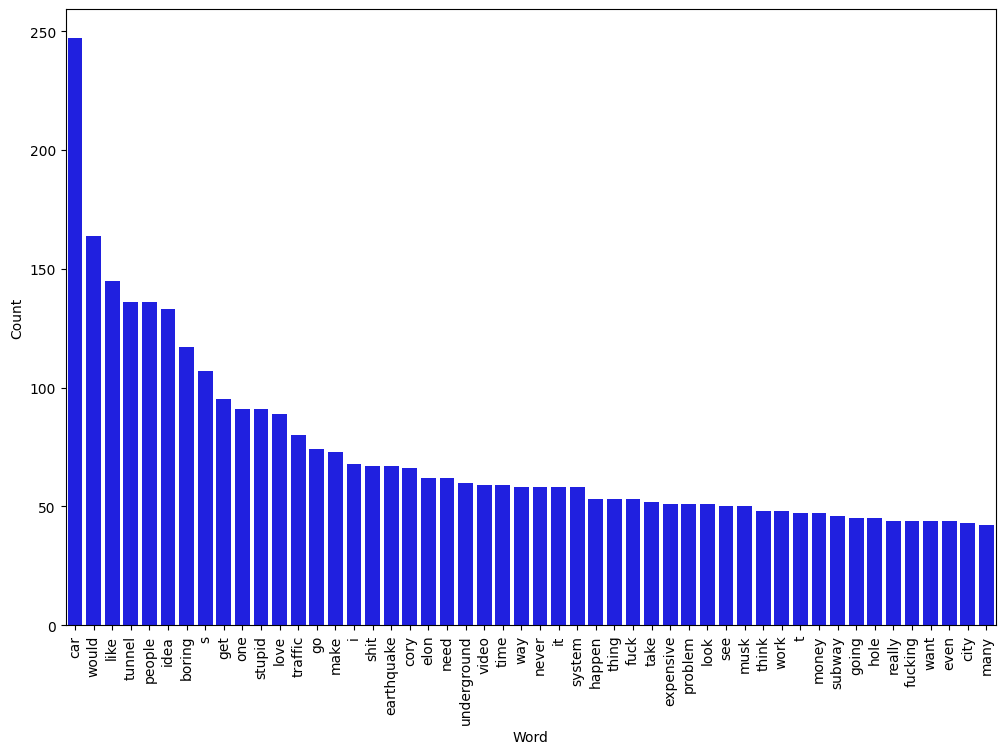

In [ ]:
__0)

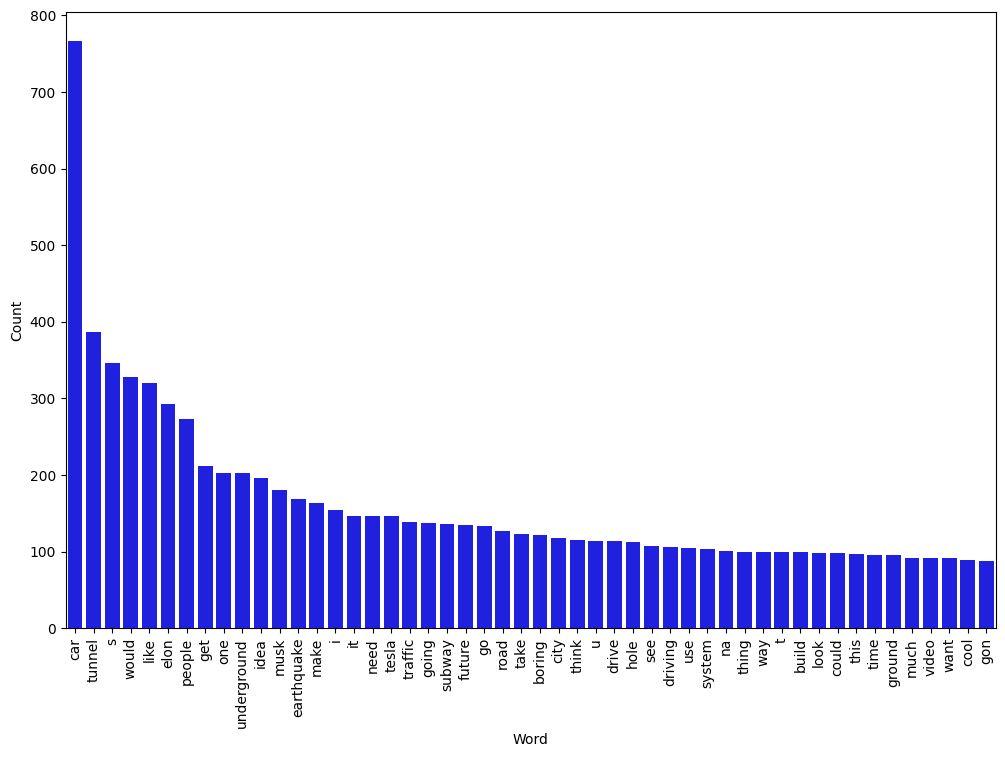

In [ ]:
counter(df[df["Sentiment"] == 0], "Comments", 50)

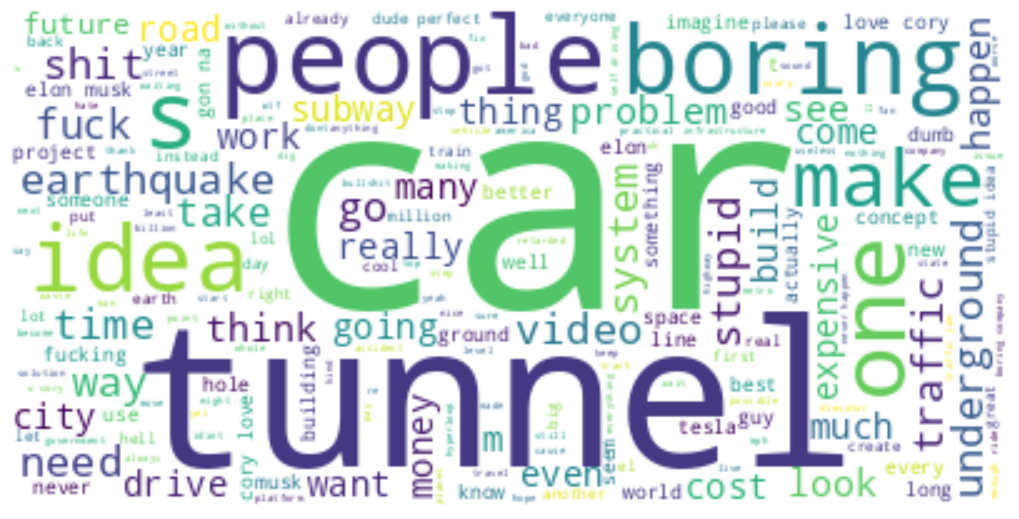

In [ ]:
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df[df.Sentiment == 1].Comments))
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

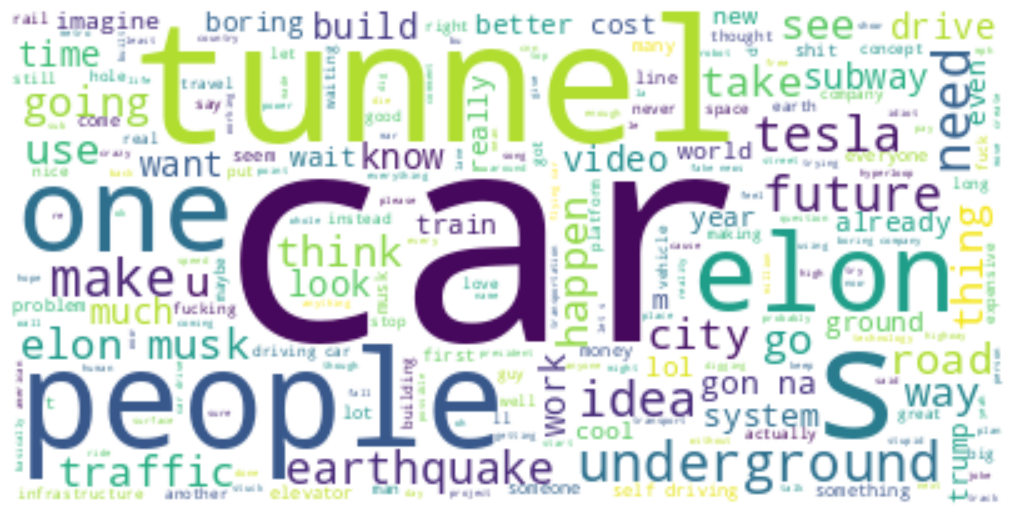

In [ ]:
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df[df.Sentiment == 0].Comments))
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**PLOT SENTIMENT DISTRIBUTION**

In [ ]:
df['Sentiment'].value_counts()

0    3370
1    1298
Name: Sentiment, dtype: int64

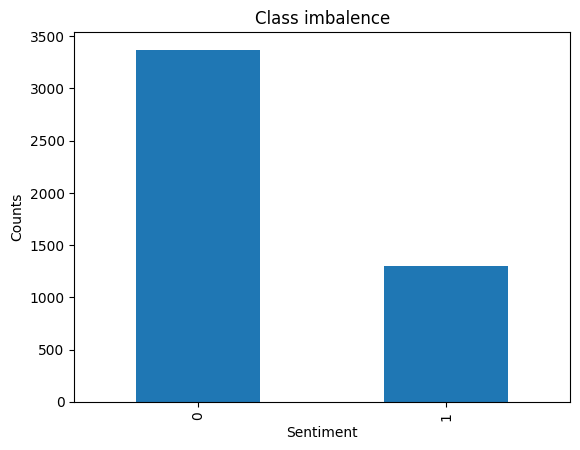

In [ ]:
value_counts = df['Sentiment'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Class imbalence')
plt.show()

RANDOM OVER SAMPLING

In [ ]:
# Random over-sampling
positive = X_train[y_train == 1]
negative = X_train[y_train == 0]
positive_upsampled = resample(positive, replace=True, n_samples=len(negative), random_state=42)
X_train_upsampled = np.vstack((negative, positive_upsampled))
y_train_upsampled = np.hstack((np.zeros(len(negative)), np.ones(len(positive_upsampled))))

In [ ]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts)
    plt.xticks(unique)
    plt.xlabel("Class")
    plt.ylabel("Number of samples")
    plt.title(title)
    plt.show()

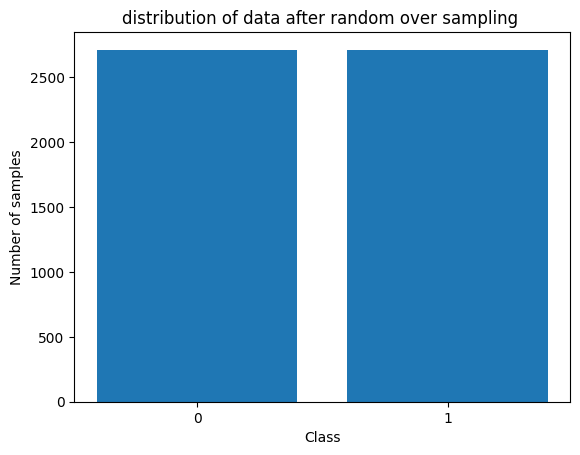

In [ ]:
# Check class imbalance after random over-sampling
plot_class_distribution(y_train_upsampled, "distribution of data after random over sampling ")

**CNN MODEL TRAINING**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Model, Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Dropout, concatenate
from keras.optimizers import Adam

In [ ]:
# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train CNN model on upsampled data
input_shape = (X_train_upsampled.shape[1], 1)
X_train_cnn = np.expand_dims(X_train_upsampled, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

cnn_model = build_cnn_model(input_shape)
cnn_model.fit(X_train_cnn, y_train_upsampled, batch_size=64, epochs=20, validation_split=0.2)

cnn_test_preds = cnn_model.predict(X_test_cnn).ravel()
cnn_test_labels = np.round(cnn_test_preds)
print("CNN Model:")
print(f"Accuracy: {accuracy_score(y_test, cnn_test_labels):.4f}")

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
68/68 [==============================] - 14s 58ms/step - loss: 0.5299 - accuracy: 0.7408 - val_loss: 0.7655 - val_accuracy: 0.5764
Epoch 2/20
68/68 [==============================] - 3s 48ms/step - loss: 0.3097 - accuracy: 0.8707 - val_loss: 0.4965 - val_accuracy: 0.7965
Epoch 3/20
68/68 [==============================] - 3s 49ms/step - loss: 0.1857 - accuracy: 0.9357 - val_loss: 0.4650 - val_accuracy: 0.8370
Epoch 4/20
68/68 [==============================] - 3s 51ms/step - loss: 0.1051 - accuracy: 0.9682 - val_loss: 0.6580 - val_accuracy: 0.8398
Epoch 5/20
68/68 [==============================] - 3s 49ms/step - loss: 0.0587 - accuracy: 0.9848 - val_loss: 0.7336 - val_accuracy: 0.8610
Epoch 6/20
68/68 [==============================] - 3s 49ms/step - loss: 0.0376 - accuracy: 0.9892 - val_loss: 0.6920 - val_accuracy: 0.8775
Epoch 7/20
68/68 [==============================] - 3s 49ms/step - loss: 0.0328 - accuracy: 0.9912 - val_loss: 0.7508 - val_accuracy: 0.8748
Epoch 8/20
6

**GAUSSIAN NAIVE BAYES**

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model on upsampled data
nb_model = GaussianNB()
nb_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate Naive Bayes model
nb_test_preds = nb_model.predict(X_test)
print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_score(y_test, nb_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and Naive Bayes models
nb_preds = nb_model.predict_proba(X_test)[:, 1]

ensemble_preds_cnn_nb = (cnn_preds + nb_preds) / 2
ensemble_labels_cnn_nb = np.round(ensemble_preds_cnn_nb)

# Evaluate ensemble model
print("Ensemble Model (CNN + Naive Bayes):")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels_cnn_nb):.4f}")


Naive Bayes Model:
Accuracy: 0.4872
Ensemble Model (CNN + Naive Bayes):
Accuracy: 0.4872


**LOGISTIC REGRESSION**

In [ ]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_upsampled, y_train_upsampled)

log_reg_test_preds = log_reg.predict(X_test)
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and Logistic Regression models
cnn_preds = cnn_model.predict(X_test_cnn).ravel()
log_reg_preds = log_reg.predict_proba(X_test)[:, 1]

ensemble_preds = (cnn_preds + log_reg_preds) / 2
ensemble_labels = np.round(ensemble_preds)

# Evaluate ensemble model
print("Ensemble Model:")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels):.4f}")

Logistic Regression Model:
Accuracy: 0.7505
30/30 [==============================] - 0s 9ms/step
Ensemble Model:
Accuracy: 0.7612


SUPPORT VECTOR MACHINE

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC

# Train SVC model on upsampled data
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate SVC model
svc_test_preds = svc_model.predict(X_test)
print("SVC Model:")
print(f"Accuracy: {accuracy_score(y_test, svc_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and SVC models
svc_preds = svc_model.predict_proba(X_test)[:, 1]

ensemble_preds_svc_cnn = (cnn_preds + svc_preds) / 2
ensemble_labels_svc_cnn = np.round(ensemble_preds_svc_cnn)

# Evaluate ensemble model
print("Ensemble Model (CNN + SVC):")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels_svc_cnn):.4f}")

SVC Model:
Accuracy: 0.7612
Ensemble Model (CNN + SVC):
Accuracy: 0.7677


**DECISION TREE CLASSIFIER**

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model on upsampled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate Decision Tree model
dt_test_preds = dt_model.predict(X_test)
print("Decision Tree Model:")
print(f"Accuracy: {accuracy_score(y_test, dt_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and Decision Tree models
dt_preds = dt_model.predict_proba(X_test)[:, 1]

ensemble_preds_cnn_dt = (cnn_preds + dt_preds) / 2
ensemble_labels_cnn_dt = np.round(ensemble_preds_cnn_dt)

# Evaluate ensemble model
print("Ensemble Model (CNN + Decision Tree):")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels_cnn_dt):.4f}")


Decision Tree Model:
Accuracy: 0.7077
Ensemble Model (CNN + Decision Tree):
Accuracy: 0.7077


**K- NEAREST NEIGHBOURS**

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Train k-Nearest Neighbors model on upsampled data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate k-Nearest Neighbors model
knn_test_preds = knn_model.predict(X_test)
print("k-Nearest Neighbors Model:")
print(f"Accuracy: {accuracy_score(y_test, knn_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and k-Nearest Neighbors models
knn_preds = knn_model.predict_proba(X_test)[:, 1]

ensemble_preds_cnn_knn = (cnn_preds + knn_preds) / 2
ensemble_labels_cnn_knn = np.round(ensemble_preds_cnn_knn)

# Evaluate ensemble model
print("Ensemble Model (CNN + k-Nearest Neighbors):")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels_cnn_knn):.4f}")


k-Nearest Neighbors Model:
Accuracy: 0.7270
Ensemble Model (CNN + k-Nearest Neighbors):
Accuracy: 0.7645


**RANDOM FOREST CLASSIFIER**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model on upsampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate Random Forest model
rf_test_preds = rf_model.predict(X_test)
print("Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, rf_test_preds):.4f}")

# Ensemble learning: Combining predictions of CNN and Random Forest models
rf_preds = rf_model.predict_proba(X_test)[:, 1]

ensemble_preds_cnn_rf = (cnn_preds + rf_preds) / 2
ensemble_labels_cnn_rf = np.round(ensemble_preds_cnn_rf)

# Evaluate ensemble model
print("Ensemble Model (CNN + Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, ensemble_labels_cnn_rf):.4f}")

Random Forest Model:
Accuracy: 0.7602
Ensemble Model (CNN + Random Forest):
Accuracy: 0.7634


**COMPARISION OF ACCURACIES**

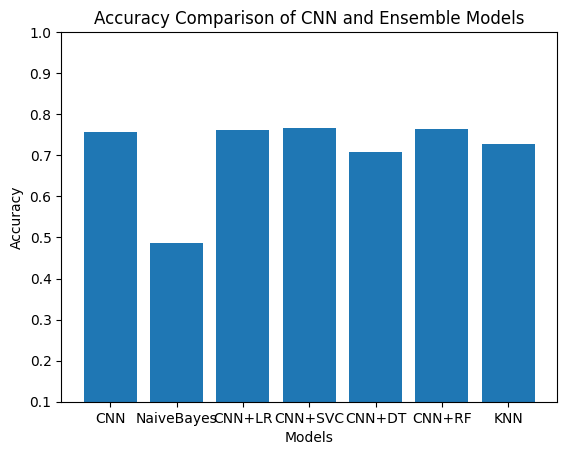

In [ ]:
# Compute accuracy scores for each model
cnn_accuracy = accuracy_score(y_test, cnn_test_labels)
ensemble_cnn_nb_accuracy = accuracy_score(y_test, nb_test_preds)
ensemble_cnn_lr_accuracy = accuracy_score(y_test, ensemble_labels)
ensemble_cnn_svc_accuracy = accuracy_score(y_test, ensemble_labels_svc_cnn)
ensemble_cnn_dt_accuracy = accuracy_score(y_test, ensemble_labels_cnn_dt)
ensemble_cnn_rf_accuracy = accuracy_score(y_test, ensemble_labels_cnn_rf)
ensemble_cnn_knn_accuracy = accuracy_score(y_test, knn_test_preds)

# List model names and corresponding accuracy scores
models = ['CNN','NaiveBayes', 'CNN+LR', 'CNN+SVC', 'CNN+DT', 'CNN+RF', 'KNN']
accuracies = [cnn_accuracy,ensemble_cnn_nb_accuracy, ensemble_cnn_lr_accuracy, ensemble_cnn_svc_accuracy,ensemble_cnn_dt_accuracy, ensemble_cnn_rf_accuracy,ensemble_cnn_knn_accuracy]

# Plot a bar graph with model names on the x-axis and accuracy scores on the y-axis
plt.bar(models, accuracies)
plt.ylim(0.1, 1.0)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of CNN and Ensemble Models')
plt.show()

